In [3]:
import pytest
from epydemix import load_predefined_model
from epydemix.population import Population, load_epydemix_population
from epydemix.visualization import plot_contact_matrix, plot_population, plot_quantiles
import matplotlib.pyplot as plt

def test_model_with_population(): 
    population = load_epydemix_population("Indonesia", path_to_data="./data/")
    print(population)

    fig, axes = plt.subplots(nrows=2, ncols=2, dpi=300)
    plot_contact_matrix(population, "school", ax=axes[0,0], fontsize=7, show_values=True)
    plot_contact_matrix(population, "work", ax=axes[0,1], fontsize=7, show_values=True)
    plot_contact_matrix(population, "home", ax=axes[1,0], fontsize=7, show_values=True)
    plot_contact_matrix(population, "community", ax=axes[1,1], fontsize=7, show_values=True)
    plt.tight_layout()

    fig, axes = plt.subplots(ncols=2, dpi=300, figsize=(10, 5))
    plot_population(population, ax=axes[0], title="Population Distribution (absolute numbers)")
    plot_population(population, ax=axes[1], title="Population Distribution (percentages)", show_perc=True)

    my_population = Population(name="My Population")    
    my_population.add_population(Nk=[100, 100], Nk_names=["A", "B"])
    my_population.add_contact_matrix(contact_matrix=[[0.2, 0.3], [0.3, 0.2]], layer_name="all")

    print(my_population)

    # create a simple SIR model
    model = load_predefined_model("SIR", transmission_rate=0.04)

    # set the population (alternatively you can import it using model.import_epydemix_population('Kenya'))    
    model.set_population(population)

    print(model)

    # simulate 
    results = model.run_simulations(start_date="2019-12-01", 
                                    end_date="2020-04-01", 
                                    percentage_in_agents=10 / model.population.Nk.sum(),
                                    Nsim=100)

    # plot results
    df_quantiles_comps = results.get_quantiles_compartments()
    ax = plot_quantiles(df_quantiles_comps, columns=["Infected_total", "Susceptible_total", "Recovered_total"], legend_loc="center right")
    ax = plot_quantiles(df_quantiles_comps, columns=["Infected_0-4", "Infected_5-19", "Infected_20-49", "Infected_50-64", "Infected_65+"], legend_loc="center right")

    population = load_epydemix_population("Kenya", 
                                      age_group_mapping={"0-9": ["0-4", "5-9"],
                                                         "10-19": ["10-14", "15-19"],
                                                         "20-29": ["20-24", "25-29"],
                                                         "30-39": ["30-34", "35-39"],
                                                         "40-49": ["40-44", "45-49"],
                                                         "50-59": ["50-54", "55-59"],
                                                         "60-69": ["60-64", "65-69"],
                                                         "70+": ["70-74", "75+"]},
                                      contacts_source="prem_2021")

    print(population)

Population(name='Indonesia')
Demographic groups: 5 groups
Population distribution:
  - 0-4: 22284711 individuals
  - 5-19: 70866787 individuals
  - 20-49: 125415658 individuals
  - 50-64: 43557148 individuals
  - 65+: 20229339 individuals
Contact matrices: 4 layers
Available layers:
  - school
  - work
  - home
  - community

Population(name='My Population')
Demographic groups: 2 groups
Population distribution:
  - A: 100 individuals
  - B: 100 individuals
Contact matrices: 1 layers
Available layers:
  - all

EpiModel(name='EpiModel')
Compartments: 3
  Susceptible, Infected, Recovered
Transitions: 2
  Transitions between compartments:
    Susceptible -> Infected, params: ('transmission_rate', 'Infected') (kind: mediated)
    Infected -> Recovered, params: recovery_rate (kind: spontaneous)
Parameters: 2
  Model parameters:
    transmission_rate: 0.04
    recovery_rate: 0.1
Population: Indonesia
  Population size: 282353643 individuals
  Demographic groups: 5
    0-4, 5-19, 20-49, 50-64,

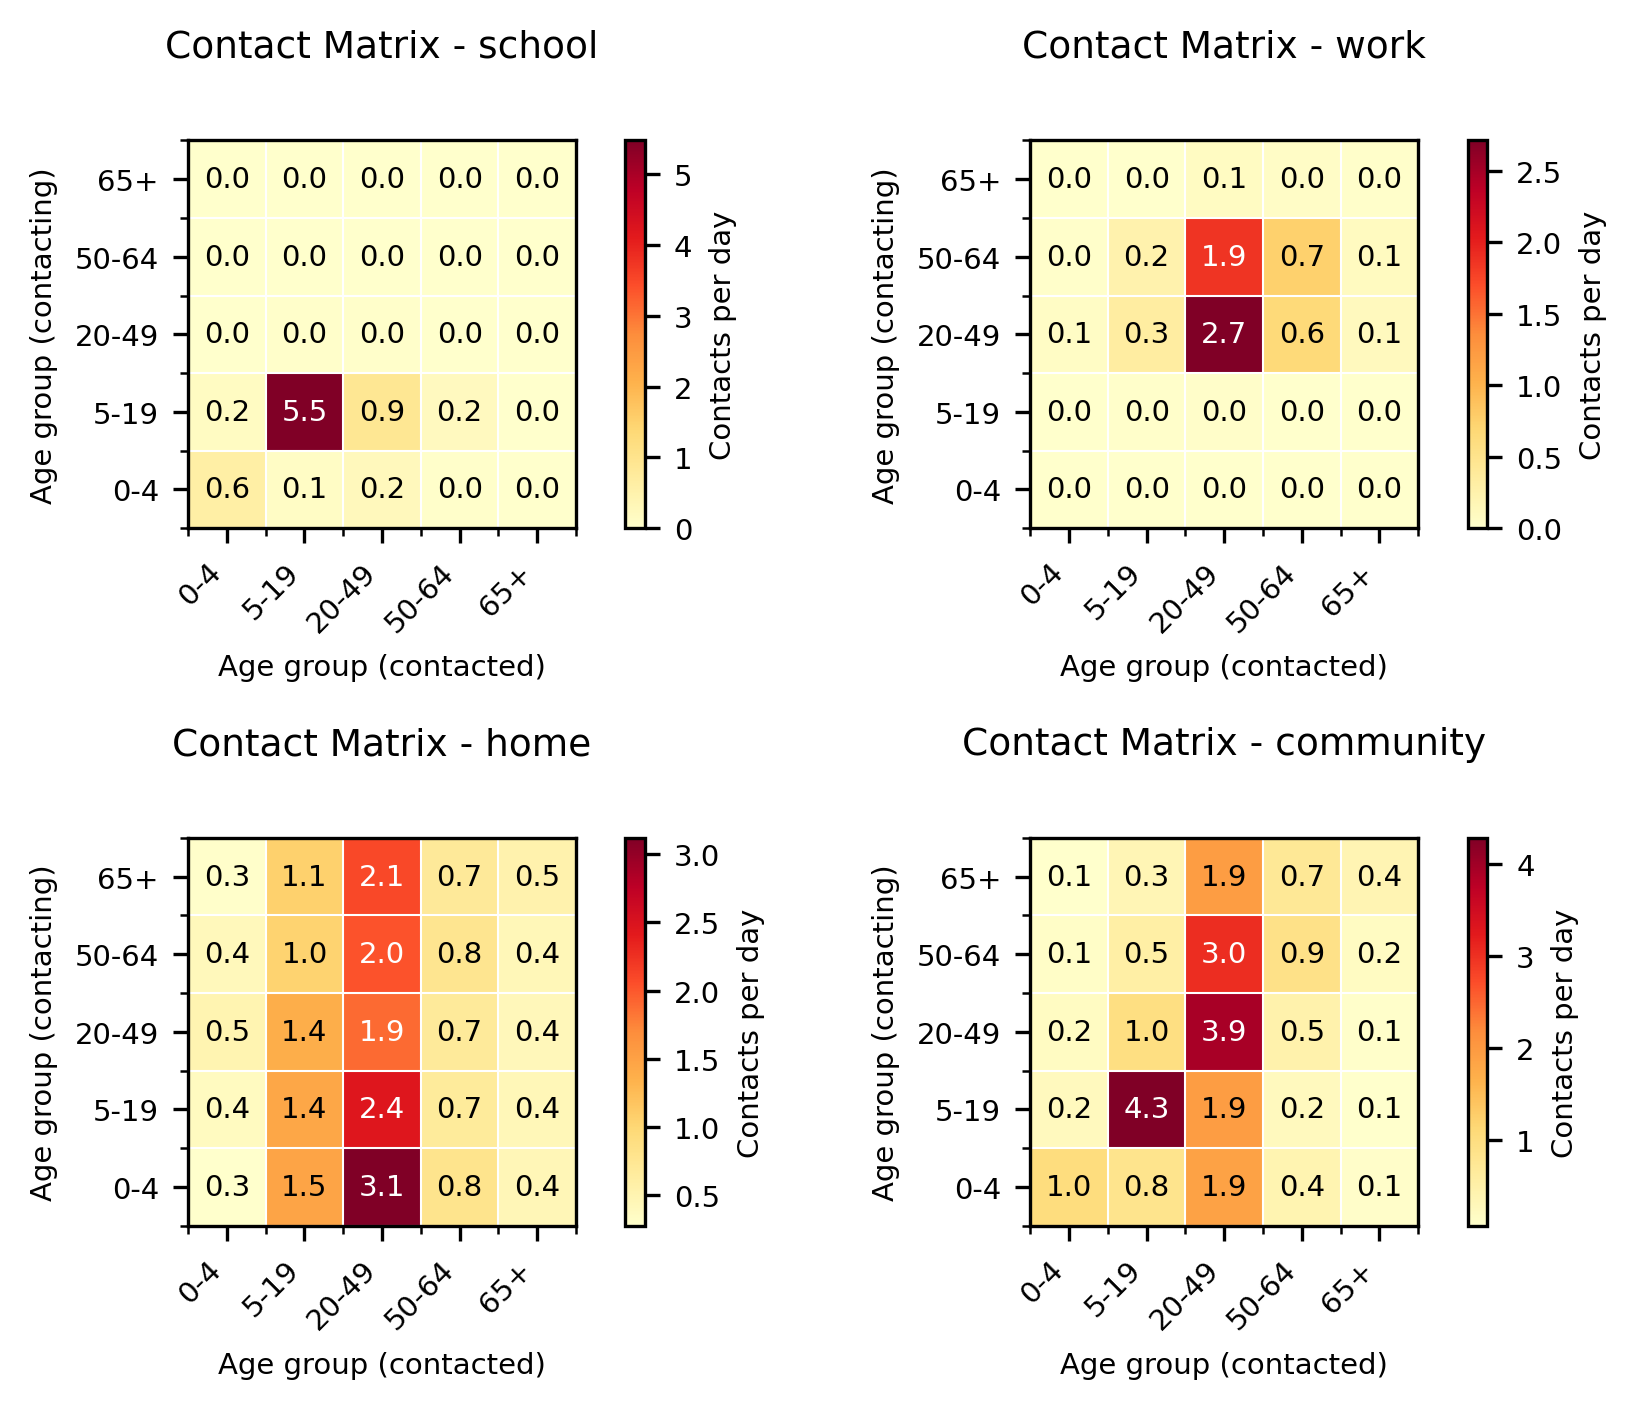

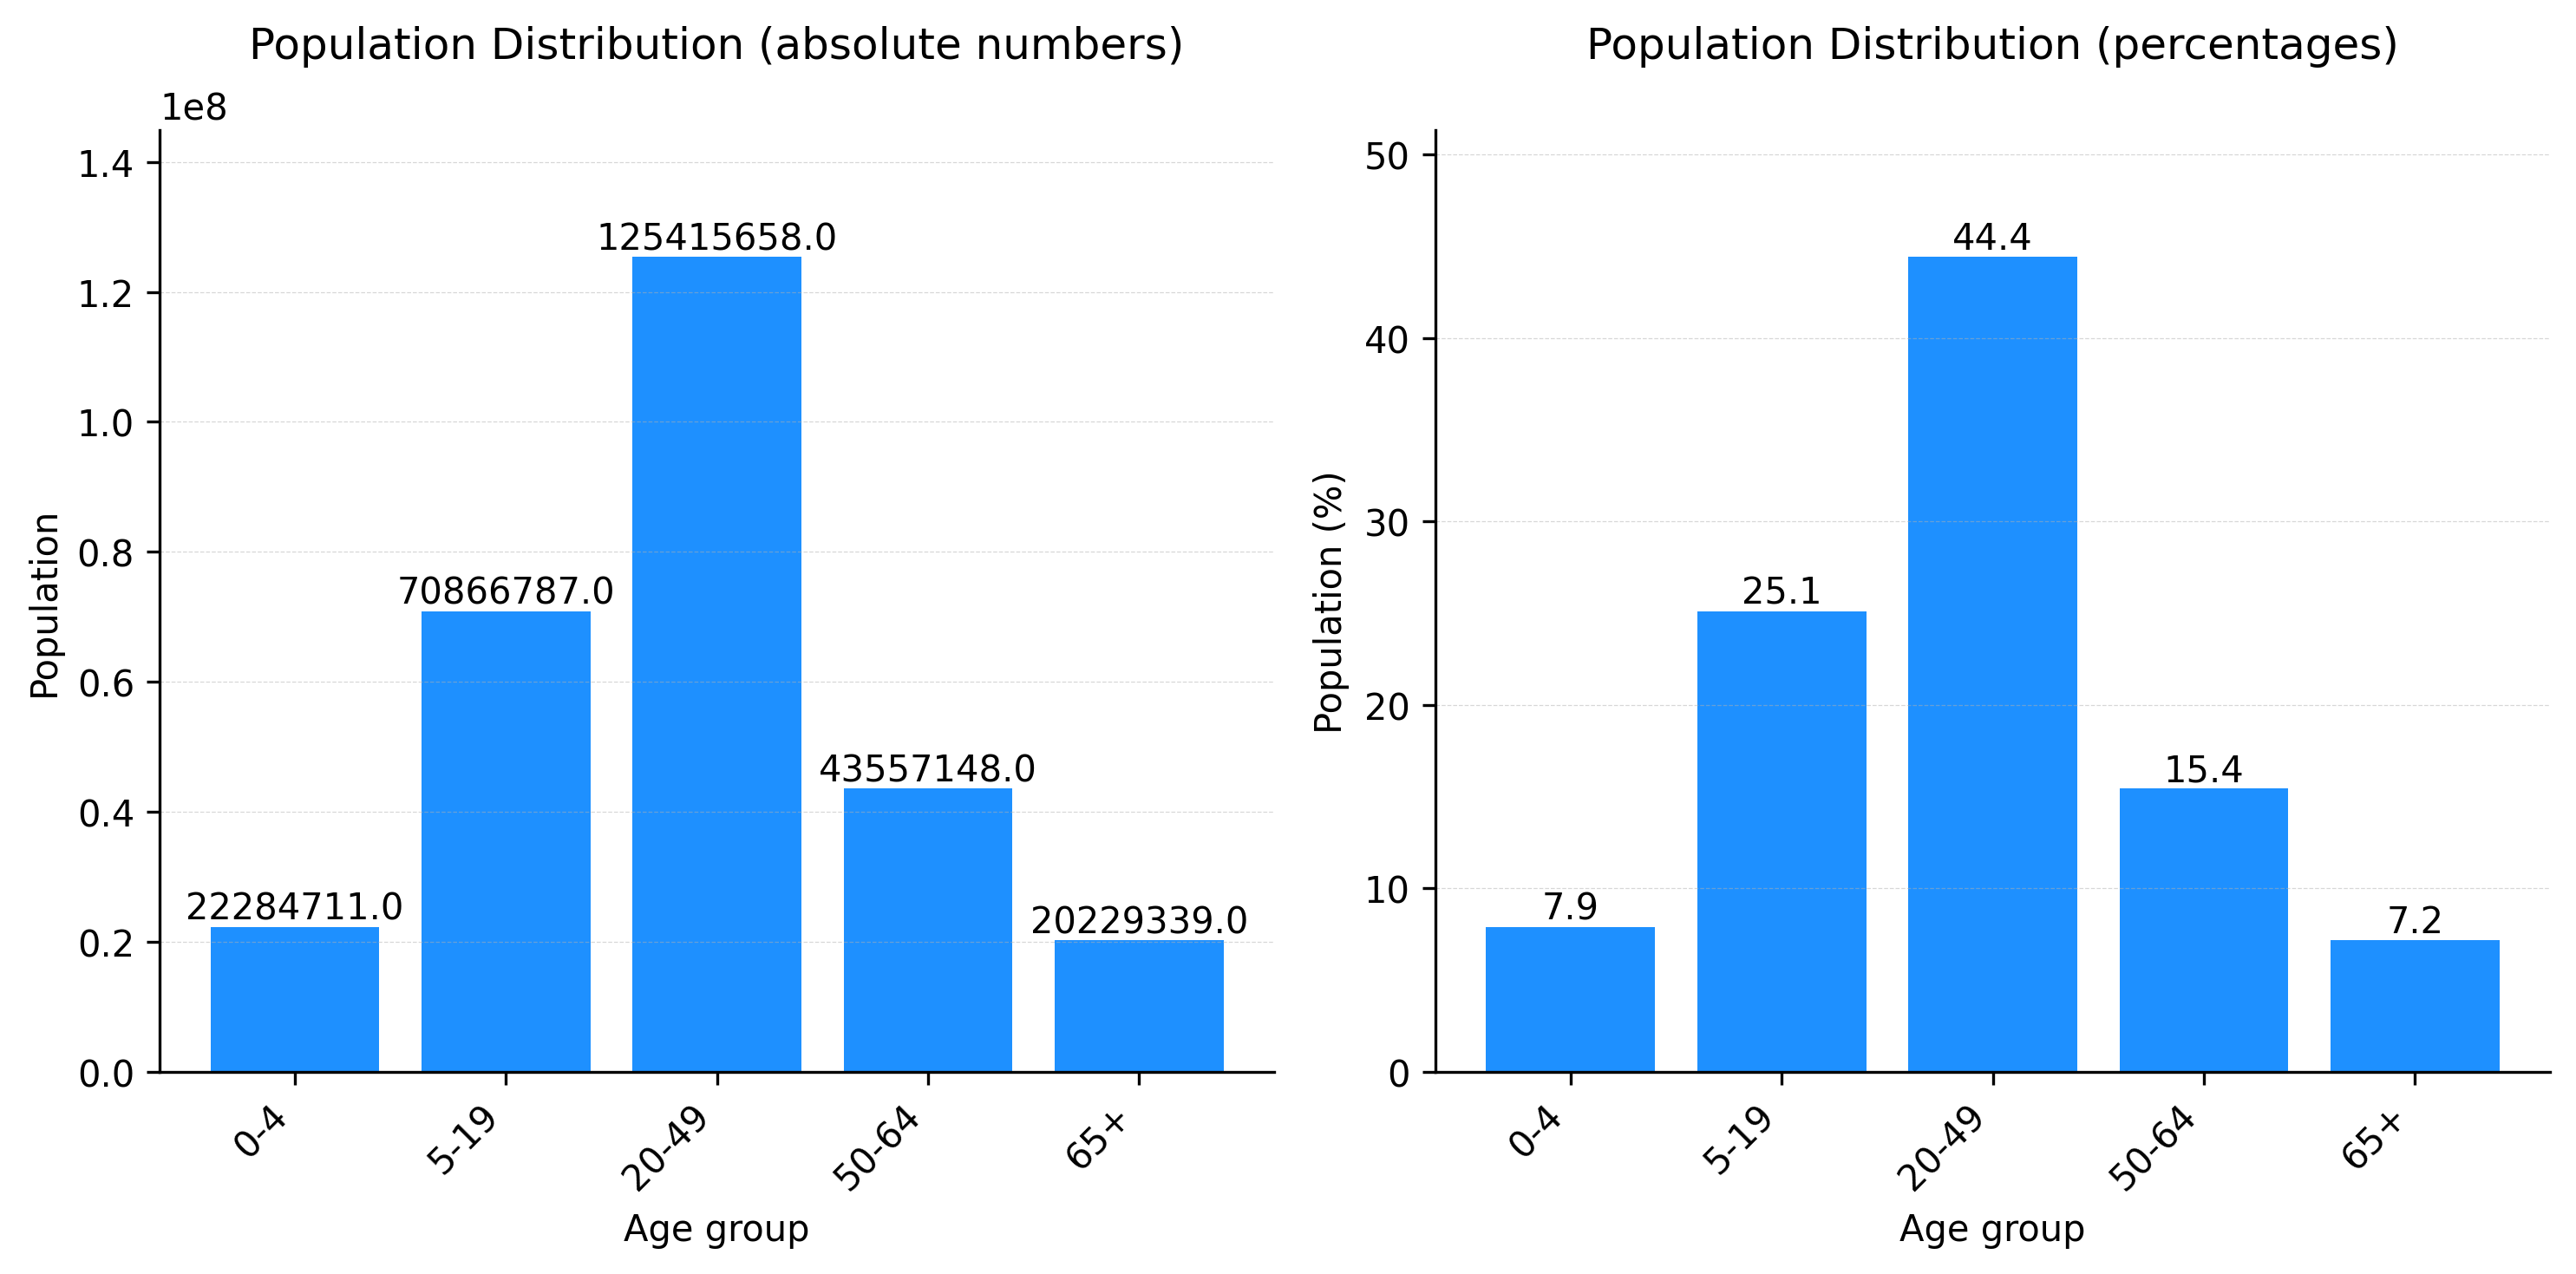

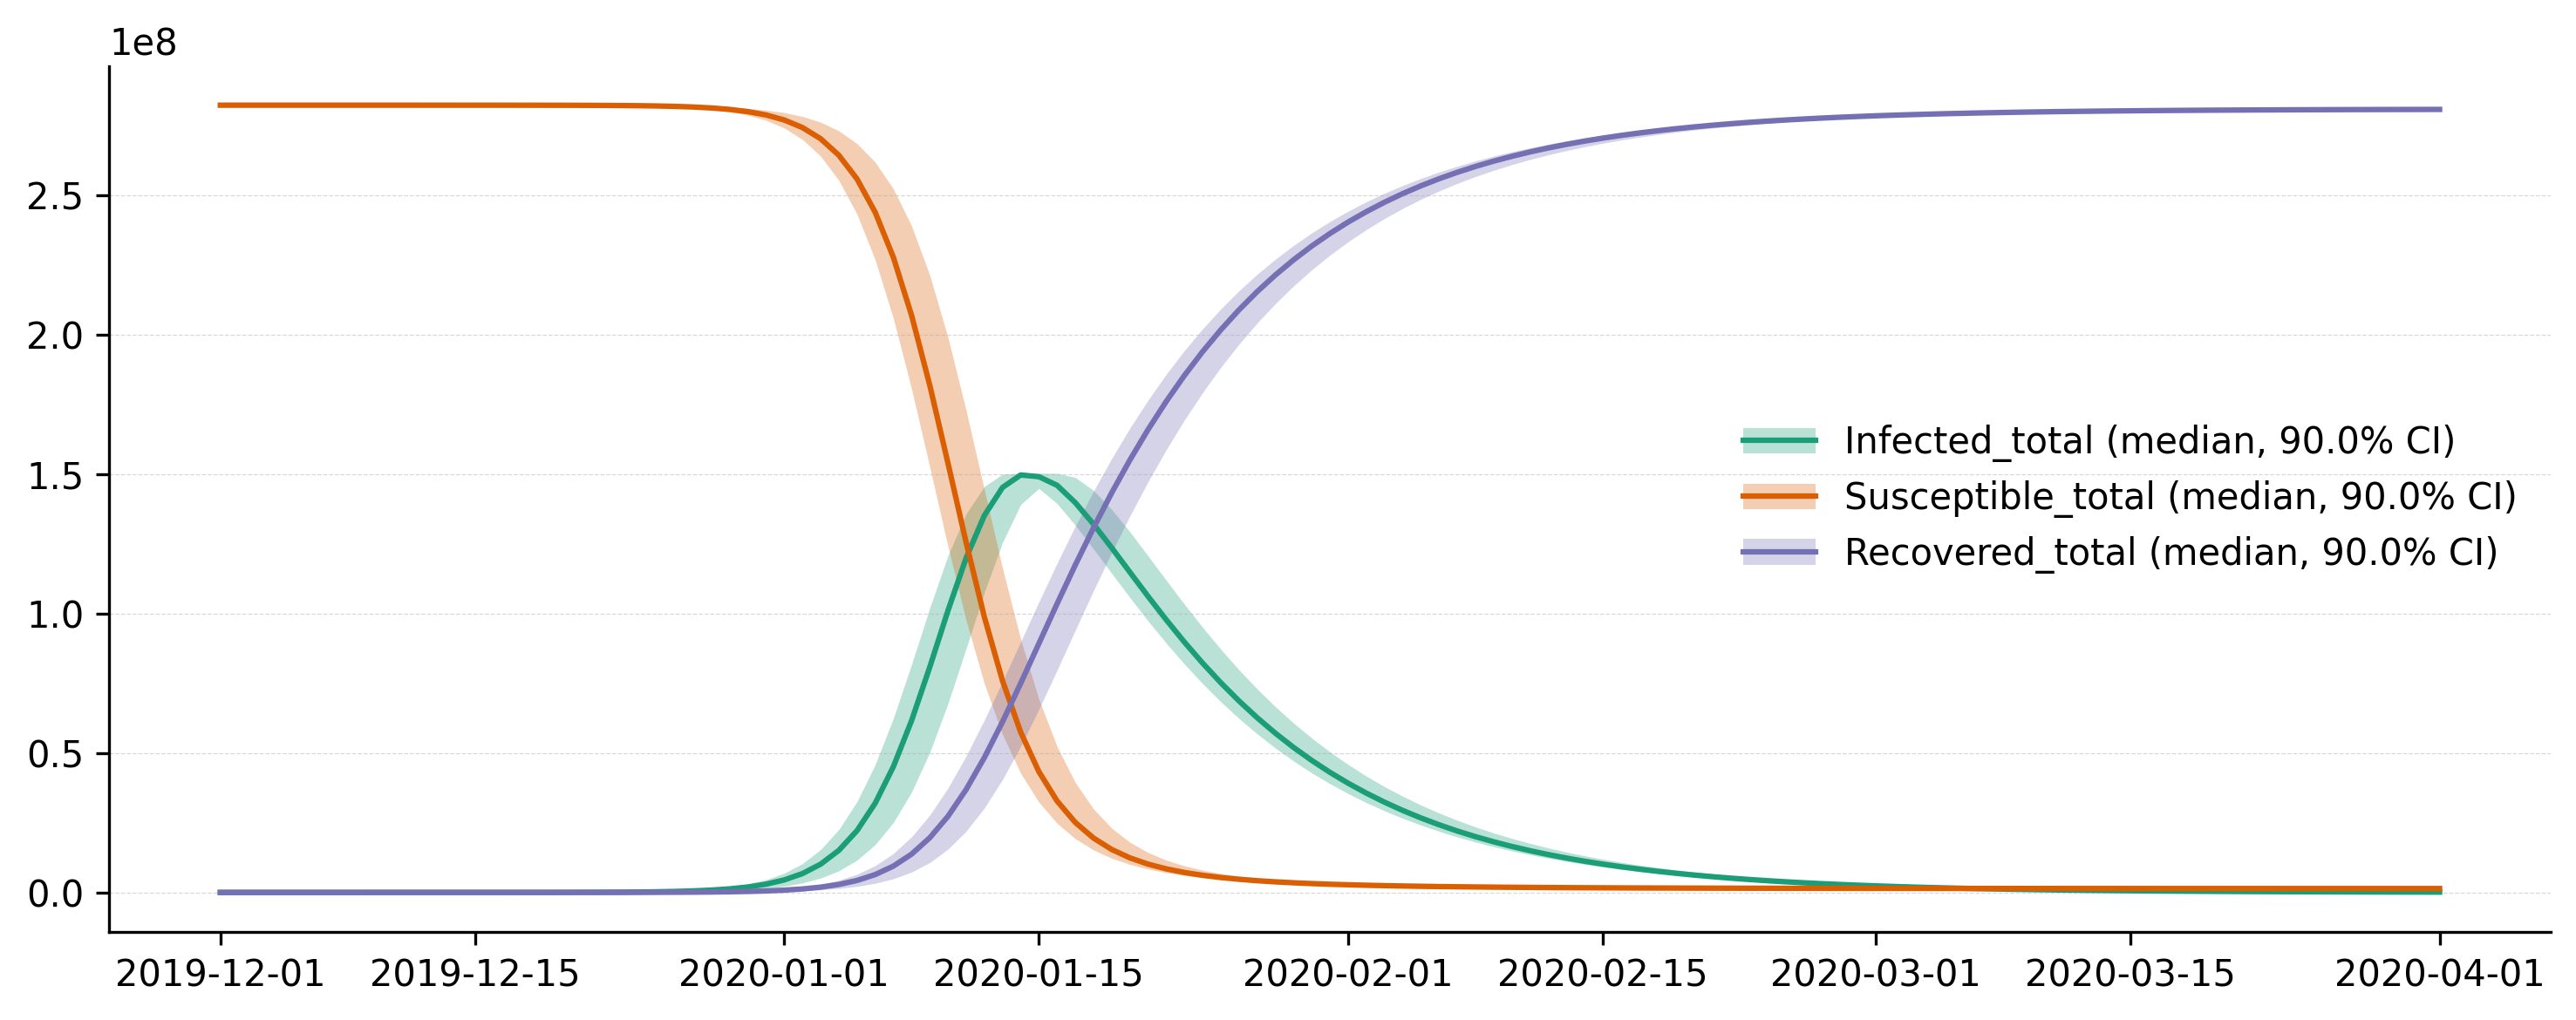

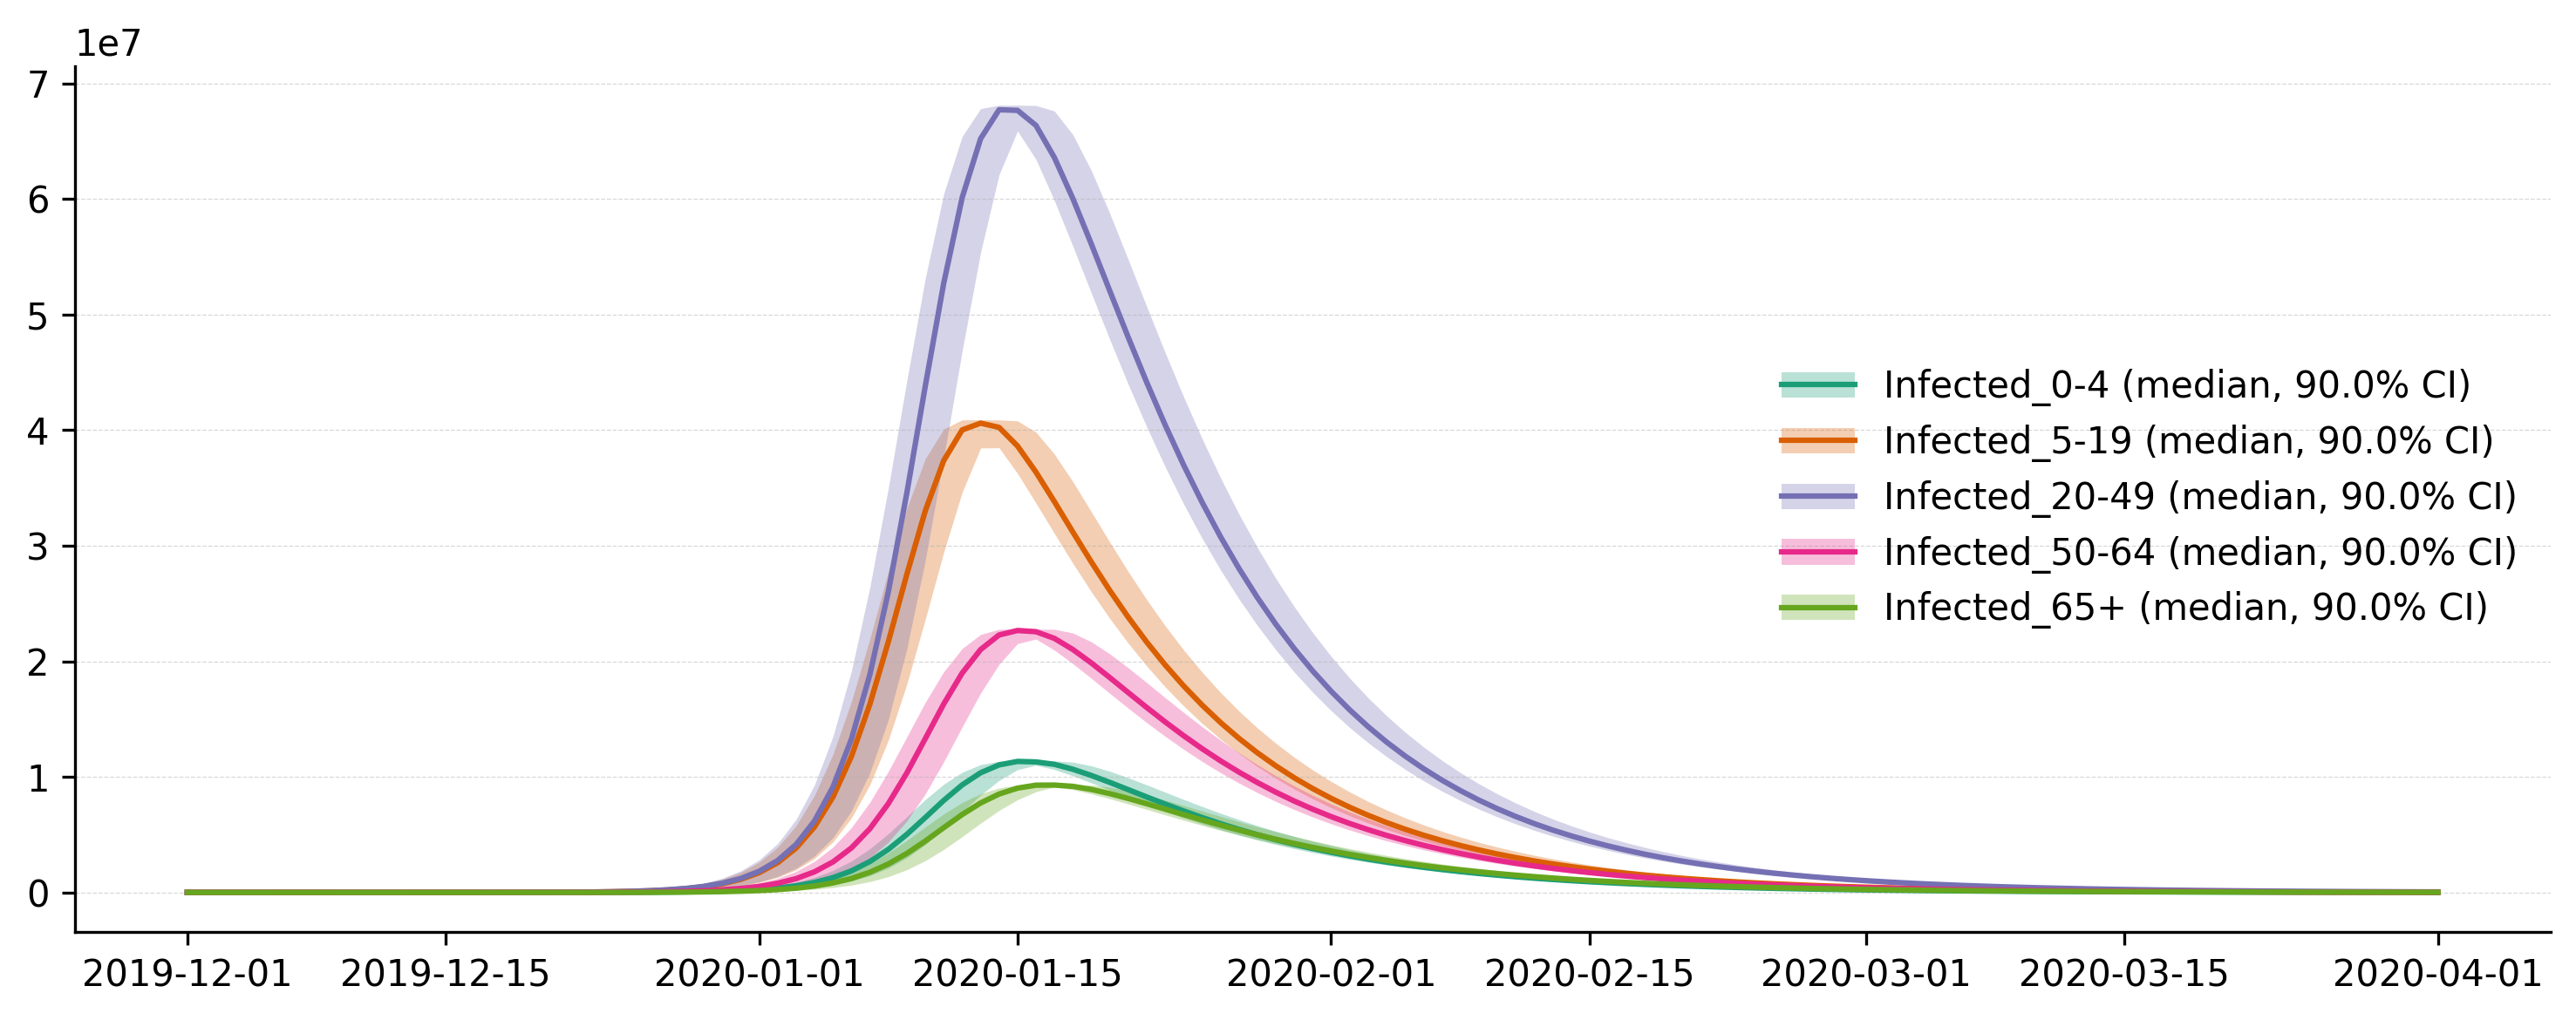

In [4]:
test_model_with_population()